In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import random
r = []
b = []
d = np.zeros((50,2))

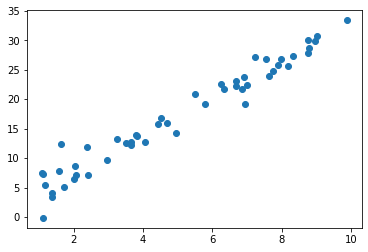

In [36]:
Mean = 0
STD = 2
for i in range (50):
    x = np.random.uniform(1,10)
    d[i,0] = x
    r.append(x)
    y = (3*x+2)+ np.random.normal(Mean,STD)
    b.append(y)
plt.scatter(r,b,marker='o')
data = {"x":r,
        "y":b}
df = DataFrame(data)

In [37]:
df_nan_x = df.copy(deep=True)
df_nan_y = df.copy(deep=True)

In [38]:
from random import sample
a = random.sample(range(0, df.shape[0]),20)
print ('list_index_nan : ',a)
for i in a:
    df_nan_x.iloc[i,0]=np.nan
    df_nan_y.iloc[i,1]=np.nan

list_index_nan :  [28, 38, 29, 8, 22, 40, 11, 20, 43, 17, 24, 3, 39, 35, 9, 18, 48, 21, 23, 34]


In [39]:
df_drop_nan = df_nan_x.copy(deep=True)
df_drop_nan = df_drop_nan.dropna()

<AxesSubplot:xlabel='x', ylabel='y'>

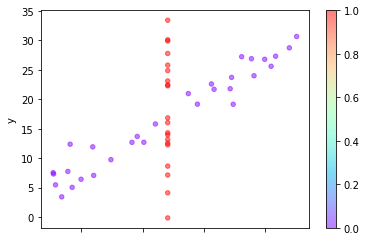

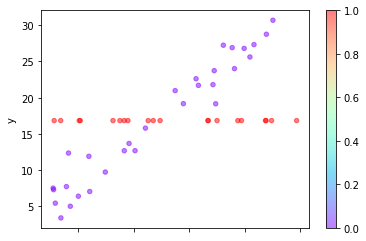

In [40]:
nullity_x = df_nan_x['x'].isnull()
for column in list(df_nan_x.columns[df_nan_x.isnull().sum()>0]):
    mean_val_x = df_nan_x[column].mean()
    df_nan_x[column].fillna(mean_val_x,inplace=True)
df_nan_x.plot(x='x', y='y',  kind='scatter', alpha=0.5,c=nullity_x, cmap='rainbow')

nullity_y = df_nan_y['y'].isnull()
for column in list(df_nan_y.columns[df_nan_y.isnull().sum()>0]):
    mean_val_y = df_nan_y[column].mean()
    df_nan_y[column].fillna(mean_val_y,inplace=True)  
df_nan_y.plot(x='x', y='y',  kind='scatter', alpha=0.5,c=nullity_y, cmap='rainbow')

In [41]:
def LinearRegression_plot_c_i (df):
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    x = np.array(df['x']).reshape(df['x'].shape[0],1)
    y = df['y']
    rg = LinearRegression()
    rg.fit(x,y)
    predict_line = rg.predict(x)
    return predict_line, rg.coef_, rg.intercept_

In [42]:
predict_nan_x, a_nan_x, b_nan_x = LinearRegression_plot_c_i(df_nan_x)
predict_nan_y, a_nan_y, b_nan_y = LinearRegression_plot_c_i(df_nan_y)
predict_drop_nan, a_drop_nan, b_drop_nan = LinearRegression_plot_c_i(df_drop_nan)
predict_inital, a_inital, b_inital = LinearRegression_plot_c_i(df)

In [56]:
def plot(df1, predict1,df2,predict2, df3,predict3,df4,predict4):
    plt.figure(figsize=(15,15))
    plt.scatter(df['x'],df['y'], c = 'royalblue', )
    plt.plot(df1['x'], predict1, c='tomato', label='replace_nan_x')
    plt.plot(df2['x'], predict2, c = 'fuchsia', label='replace_nan_y')
    plt.plot(df3['x'], predict3, c = 'blue',label='drop_na')
    plt.plot(df4['x'], predict4, c = 'cyan',label='initial')
    plt.legend(prop={'size':30})
    plt.show()

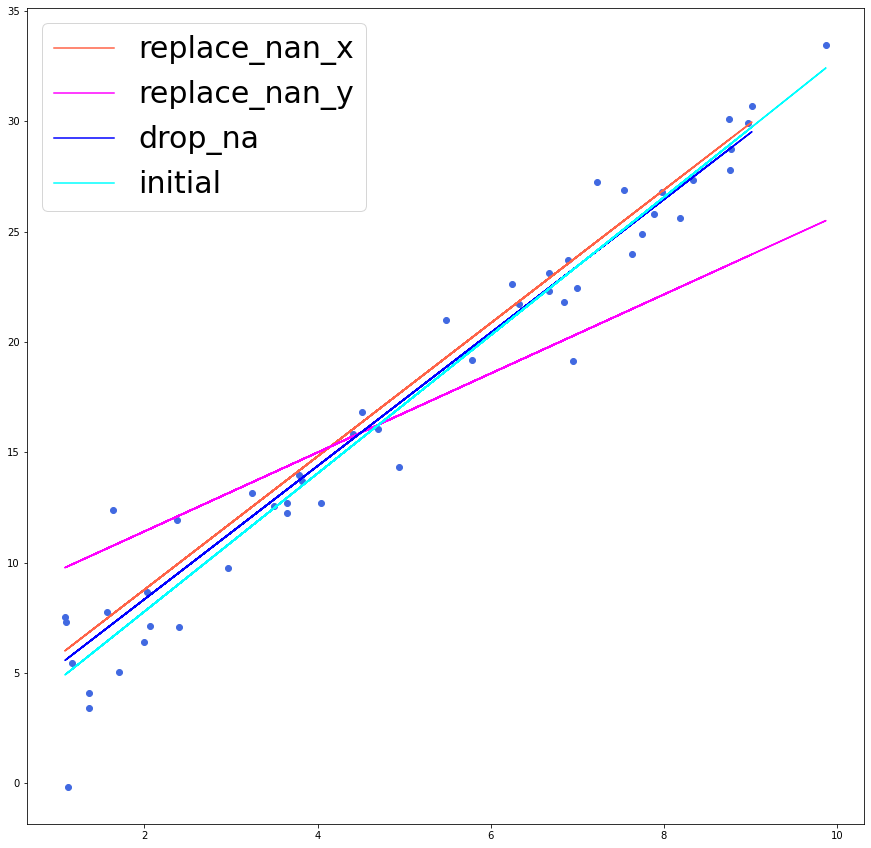

In [57]:
plot(df_nan_x, predict_nan_x,df_nan_y,predict_nan_y, df_drop_nan,predict_drop_nan, df,predict_inital )

In [50]:
print ("y = ax + b")
print ("replace_nan_x : ", "a=", a_nan_x, "b=", b_nan_x)
print ("replace_nan_y : ","a=",a_nan_y,"b=", b_nan_y)
print ("Drop_nan      :  ","a=",a_drop_nan,"b=", b_drop_nan)
print ("initial dataset :","a=",a_inital,"b=", b_inital)

y = ax + b
replace_nan_x :  a= [3.02215176] b= 2.723461035370091
replace_nan_y :  a= [1.79094311] b= 7.828777890545815
Drop_nan      :   a= [3.02215176] b= 2.2876989206541136
initial dataset : a= [3.13205566] b= 1.5123210778811647
